In [1]:
from utils.read_file import load_jsonl
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
data_dir = 'data/vlsp_processed'
fns = ['train.jsonl', 'dev.jsonl', 'test.jsonl',]

In [3]:
data = load_jsonl(os.path.join(data_dir, fns[0]))

In [4]:
tokenizer = AutoTokenizer.from_pretrained('vinai/phobert-base')

Special tokens have been added in the vocabulary, make sure the associated word embedding are fine-tuned or trained.


In [5]:
seq_lengths = [3 + len(tokenizer.encode(s['query'], add_special_tokens=False))
               + len(tokenizer.encode(s['context'], add_special_tokens=False))
               for s in data]

Token indices sequence length is longer than the specified maximum sequence length for this model (792 > 256). Running this sequence through the model will result in indexing errors


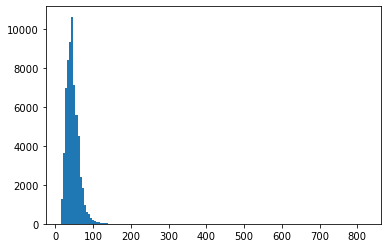

In [6]:
plt.hist(seq_lengths, bins=150)
plt.show()

In [7]:
sorted_arr = np.sort(np.array(seq_lengths))[::-1]

In [8]:
sorted_arr[:20]

array([822, 814, 813, 807, 556, 548, 547, 541, 217, 209, 208, 208, 202,
       200, 199, 199, 193, 191, 190, 189])

In [9]:
dev_data = load_jsonl(os.path.join(data_dir, fns[1]))

In [10]:
dev_seq_lengths = [3 + len(tokenizer.encode(s['query'], add_special_tokens=False))
               + len(tokenizer.encode(s['context'], add_special_tokens=False))
               for s in dev_data]

In [11]:
np.sort(np.array(dev_seq_lengths))[::-1][:20]

array([159, 158, 154, 153, 152, 151, 150, 150, 150, 149, 146, 146, 145,
       145, 144, 144, 144, 143, 143, 142])

In [12]:
test_data = load_jsonl(os.path.join(data_dir, fns[2]))

In [13]:
test_seq_lengths = [3 + len(tokenizer.encode(s['query'], add_special_tokens=False))
               + len(tokenizer.encode(s['context'], add_special_tokens=False))
               for s in test_data]

In [14]:
np.sort(np.array(test_seq_lengths))[::-1][:20]


array([508, 500, 499, 493, 219, 211, 210, 204, 195, 191, 187, 186, 183,
       182, 180, 176, 167, 166, 162, 159])

In [15]:
np.where(np.array(test_seq_lengths) == 508)

(array([29641]),)